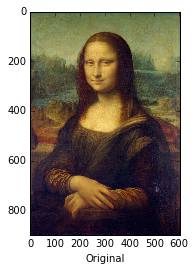

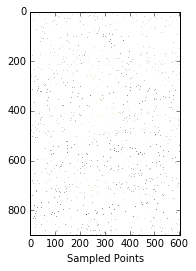

In [1]:
# 2b. Preprocessing the input.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# number of points sampled for training
SAMPLE_SIZE = 5000

# load image
img = Image.open("MonaLisa.jpg")
img = np.asarray(img)
plt.imshow(img)
plt.xlabel("Original")
plt.show()

# process data
data, label = [], []
row = img.shape[0]
col = img.shape[1]
for i in range(SAMPLE_SIZE):
    point = []
    point.append(np.random.randint(row))
    point.append(np.random.randint(col))
    data.append(point)
    label.append(img[point[0],point[1]])
data = np.array(data)
label = np.array(label)

# create a white image
sampledImg = np.zeros([row,col,3], dtype=np.uint8)
sampledImg.fill(255)
for i in range(SAMPLE_SIZE):
    sampledImg[data[i,0]][data[i,1]] = label[i]
plt.imshow(sampledImg)
plt.xlabel("Sampled Points")
plt.show()

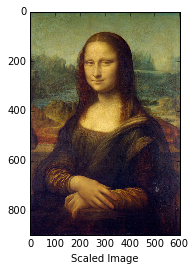

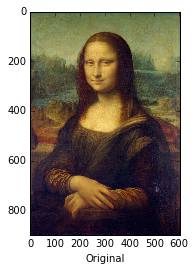

In [3]:
# 2d. Rescale the pixel intensities.
scaledImg = np.array(img, dtype=float)
for i in range(row):
    for j in range(col):
        scaledImg[i,j] = img[i,j] / 255
plt.imshow(scaledImg)
plt.xlabel("Scaled Image")
plt.show()

plt.xlabel("Original")
plt.imshow(img)
plt.show()

scaledLabel = np.array(label, dtype=float)
scaledLabel /= 255    

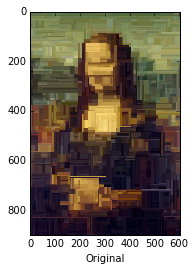

In [7]:
# 2f. Build the final image.
from sklearn.ensemble import RandomForestRegressor

def run_random_forest(n_tree=1, depth=None, xlabel="Original"):
    rf = RandomForestRegressor(random_state=0, n_estimators=n_tree, max_depth=depth)
    rf.fit(data, label)
    pred = np.zeros([row,col,3])
    for i in range(row):
        for j in range(col):
            point = [i,j]
            point = np.array(point)
            pred[i,j] = rf.predict(point.reshape(1,-1)) / 255
    plt.xlabel(xlabel)
    plt.imshow(pred)
    plt.show()
    return pred

pred = run_random_forest()

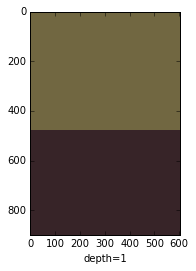

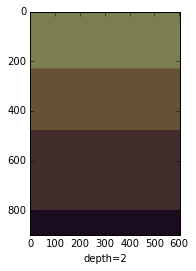

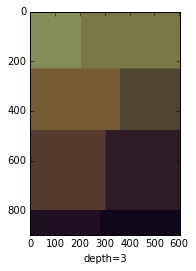

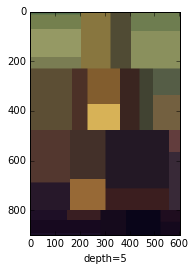

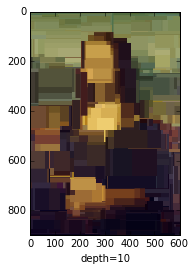

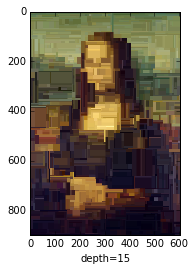

array([[[ 0.29019608,  0.44705882,  0.35294118],
        [ 0.29019608,  0.44705882,  0.35294118],
        [ 0.29019608,  0.44705882,  0.35294118],
        ..., 
        [ 0.24705882,  0.36078431,  0.2745098 ],
        [ 0.24705882,  0.36078431,  0.2745098 ],
        [ 0.24705882,  0.36078431,  0.2745098 ]],

       [[ 0.29019608,  0.44705882,  0.35294118],
        [ 0.29019608,  0.44705882,  0.35294118],
        [ 0.29019608,  0.44705882,  0.35294118],
        ..., 
        [ 0.24705882,  0.36078431,  0.2745098 ],
        [ 0.24705882,  0.36078431,  0.2745098 ],
        [ 0.24705882,  0.36078431,  0.2745098 ]],

       [[ 0.29019608,  0.44705882,  0.35294118],
        [ 0.29019608,  0.44705882,  0.35294118],
        [ 0.29019608,  0.44705882,  0.35294118],
        ..., 
        [ 0.24705882,  0.36078431,  0.2745098 ],
        [ 0.24705882,  0.36078431,  0.2745098 ],
        [ 0.24705882,  0.36078431,  0.2745098 ]],

       ..., 
       [[ 0.02745098,  0.00392157,  0.10588235],
        

In [4]:
# A single decision tree, but with depths 1, 2, 3, 5, 10, and 15.
run_random_forest(depth=1, xlabel="depth=1")
run_random_forest(depth=2, xlabel="depth=2")
run_random_forest(depth=3, xlabel="depth=3")
run_random_forest(depth=5, xlabel="depth=5")
run_random_forest(depth=10, xlabel="depth=10")
run_random_forest(depth=15, xlabel="depth=15")

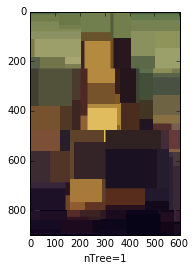

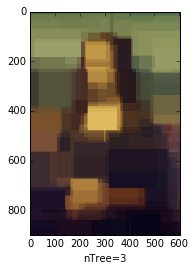

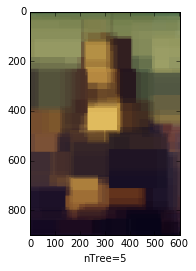

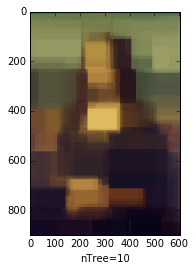

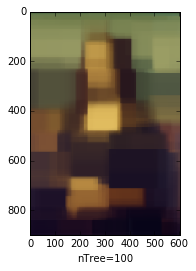

array([[[ 0.27817454,  0.41146582,  0.29537857],
        [ 0.27817454,  0.41146582,  0.29537857],
        [ 0.27817454,  0.41146582,  0.29537857],
        ..., 
        [ 0.25957092,  0.37084971,  0.25326464],
        [ 0.25957092,  0.37084971,  0.25326464],
        [ 0.25957092,  0.37084971,  0.25326464]],

       [[ 0.2770229 ,  0.41299915,  0.29910929],
        [ 0.2770229 ,  0.41299915,  0.29910929],
        [ 0.2770229 ,  0.41299915,  0.29910929],
        ..., 
        [ 0.25798824,  0.37035657,  0.25098915],
        [ 0.25798824,  0.37035657,  0.25098915],
        [ 0.25798824,  0.37035657,  0.25098915]],

       [[ 0.28584033,  0.41730659,  0.29619385],
        [ 0.28584033,  0.41730659,  0.29619385],
        [ 0.28584033,  0.41730659,  0.29619385],
        ..., 
        [ 0.26161318,  0.37773697,  0.25453415],
        [ 0.26161318,  0.37773697,  0.25453415],
        [ 0.26161318,  0.37773697,  0.25453415]],

       ..., 
       [[ 0.08201721,  0.04429117,  0.14795247],
        

In [5]:
# Depth 7, but with number of trees equal to 1, 3, 5, 10, and 100.
run_random_forest(n_tree=1, depth=7, xlabel="nTree=1")
run_random_forest(n_tree=3, depth=7, xlabel="nTree=3")
run_random_forest(n_tree=5, depth=7, xlabel="nTree=5")
run_random_forest(n_tree=10, depth=7, xlabel="nTree=10")
run_random_forest(n_tree=100, depth=7, xlabel="nTree=100")

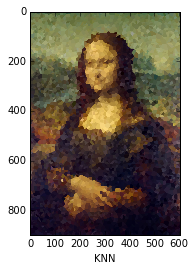

In [2]:
# K-NN
from sklearn.neighbors import KNeighborsClassifier

def run_knn(xlabel="KNN"):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(data, label)
    pred = np.zeros([row,col,3])
    for i in range(row):
        for j in range(col):
            point = [i,j]
            point = np.array(point)
            pred[i,j] = knn.predict(point.reshape(1,-1)) / 255
    plt.xlabel(xlabel)
    plt.imshow(pred)
    plt.show()
    return pred
pred = run_knn()